In [267]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## References


*    [Scikit Learn](https://scikit-learn.org/stable/modules/tree.html) decision tree documentation
*   [Breast Cancer dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/) - UCI Machine learning database
*   [Medium article ](https://medium.com/@chyun55555/decision-tree-classifier-with-scikit-learn-from-python-e83f38079fea) for modeling decision trees
*  [Hands-On Machine Learning book](https://www.amazon.com/Hands-Machine-Learning-Scikit-Learn-TensorFlow/dp/1491962291) for decision trees and random forests
* [ Medium article](https://medium.com/@jaimejcheng/data-exploration-and-visualization-with-seaborn-pair-plots-40e6d3450f6d) for Seaborn pair plots


# Data Loading and Cleaning

In [268]:
data = pd.read_csv('/content/breast-cancer-wisconsin.data', header = None)

In [269]:
#rename
data = data.rename(columns = {0:'id', 1:'Thickness', 2: 'Size Uniformity', 3: 'Shape Uniformity', 4:'Marginal Adhesion',
                              5: 'Epithelial Cell Size', 6: 'Bare Nuclei', 7:'Bland Chromatin', 8: 'Normal Nucleoli', 9: 'Mitoses', 10:'diagnosis'})
data

,id,Thickness,Size Uniformity,Shape Uniformity,Marginal Adhesion,Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,diagnosis
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [270]:
data.shape

(699, 11)

In [271]:
data.isnull().sum()

id                      0
Thickness               0
Size Uniformity         0
Shape Uniformity        0
Marginal Adhesion       0
Epithelial Cell Size    0
Bare Nuclei             0
Bland Chromatin         0
Normal Nucleoli         0
Mitoses                 0
diagnosis               0
dtype: int64

In [272]:
data.drop('id', axis = 1, inplace = True)
data.shape

(699, 10)

In [273]:
print(data['diagnosis'].value_counts())
data['diagnosis'][data['diagnosis'] == 2] = 'b'
data['diagnosis'][data['diagnosis'] == 4] = 'm'
print(data.head())



2    458
4    241
Name: diagnosis, dtype: int64
   Thickness  Size Uniformity  Shape Uniformity  Marginal Adhesion  \
0          5                1                 1                  1   
1          5                4                 4                  5   
2          3                1                 1                  1   
3          6                8                 8                  1   
4          4                1                 1                  3   

   Epithelial Cell Size Bare Nuclei  Bland Chromatin  Normal Nucleoli  \
0                     2           1                3                1   
1                     7          10                3                2   
2                     2           2                3                1   
3                     3           4                3                7   
4                     2           1                3                1   

   Mitoses diagnosis  
0        1         b  
1        1         b  
2        1         b  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [274]:
#set as numeric
cols = data.columns.drop('diagnosis')
data[cols] = data[cols].apply(pd.to_numeric, errors='coerce')
data.dtypes
data.head()

,Thickness,Size Uniformity,Shape Uniformity,Marginal Adhesion,Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,diagnosis
0,5,1,1,1,2,1.0,3,1,1,b
1,5,4,4,5,7,10.0,3,2,1,b
2,3,1,1,1,2,2.0,3,1,1,b
3,6,8,8,1,3,4.0,3,7,1,b
4,4,1,1,3,2,1.0,3,1,1,b


# Data Visualizations

Creating a pairplot to show the relationships between size and the diagnosis. You can see that generally, oversized attributes of cells are phenomenal indicators of whether a cell is malignant or benign

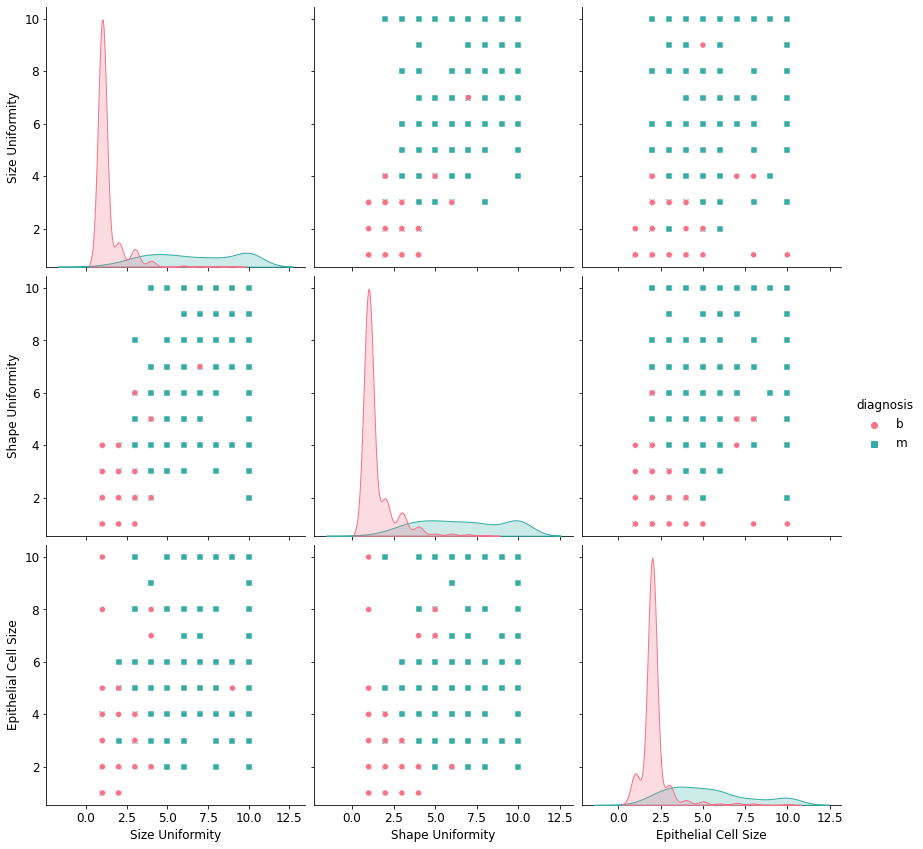

In [275]:
plot = data[['Size Uniformity','Shape Uniformity','Epithelial Cell Size','diagnosis']]
sns.pairplot(plot, hue='diagnosis', vars=['Size Uniformity','Shape Uniformity','Epithelial Cell Size'], palette="husl", markers=["o", "s"],height=4)

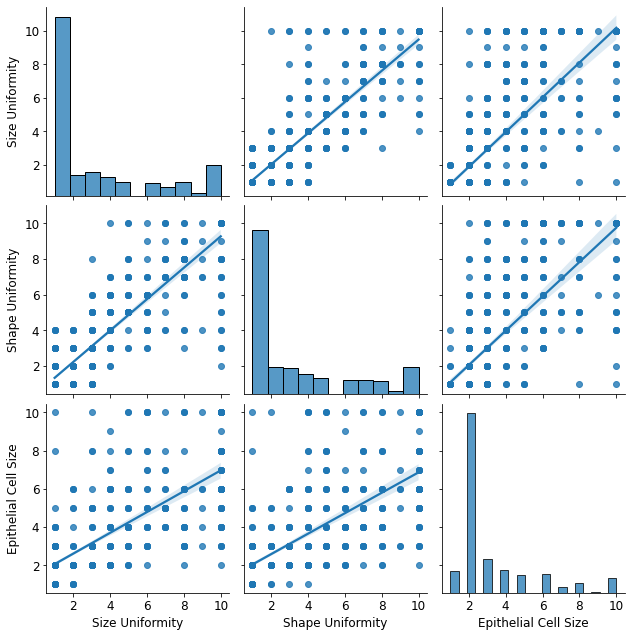

In [276]:
sns.pairplot(plot, kind = 'reg',height = 3)

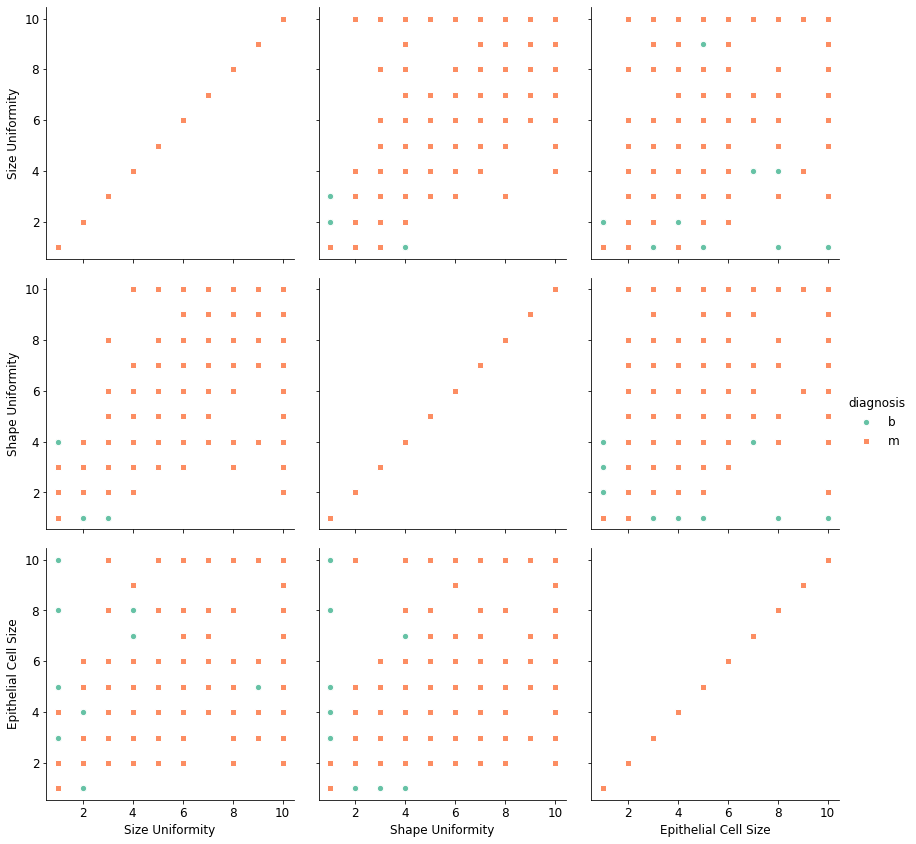

In [277]:
g = sns.PairGrid(plot, hue="diagnosis", palette="Set2",height=4,hue_kws={"marker": ["o", "s"]})
g = g.map(plt.scatter, linewidths=1, edgecolor="w", s=40)
g = g.add_legend()



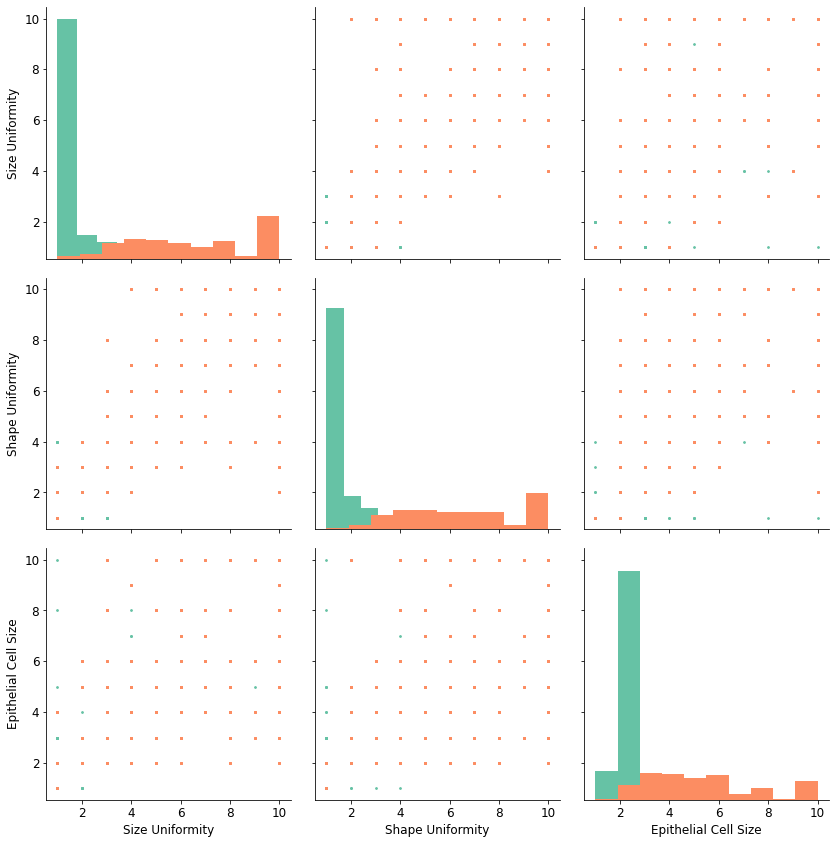

In [278]:
g = sns.PairGrid(plot, hue="diagnosis", palette="Set2",height=4,hue_kws={"marker": ["o", "s"]})
g = g.map_diag(plt.hist) #graph the diagonals differently
g = g.map_offdiag(plt.scatter, s = 3) 

In [279]:
#more visuals on other columns

In [280]:
def categorical_to_numeric_diagnosis(x):
    if x=='m':
        return 1
    if x=='b':
        return 0

data['diagnosis']= data['diagnosis'].apply(categorical_to_numeric_diagnosis)
data["diagnosis"].value_counts()

0    458
1    241
Name: diagnosis, dtype: int64

Seems like most of the graphs below indicate that there isn't much other data issues, the distributions seem to be reasonable

[[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa1999c0710>


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


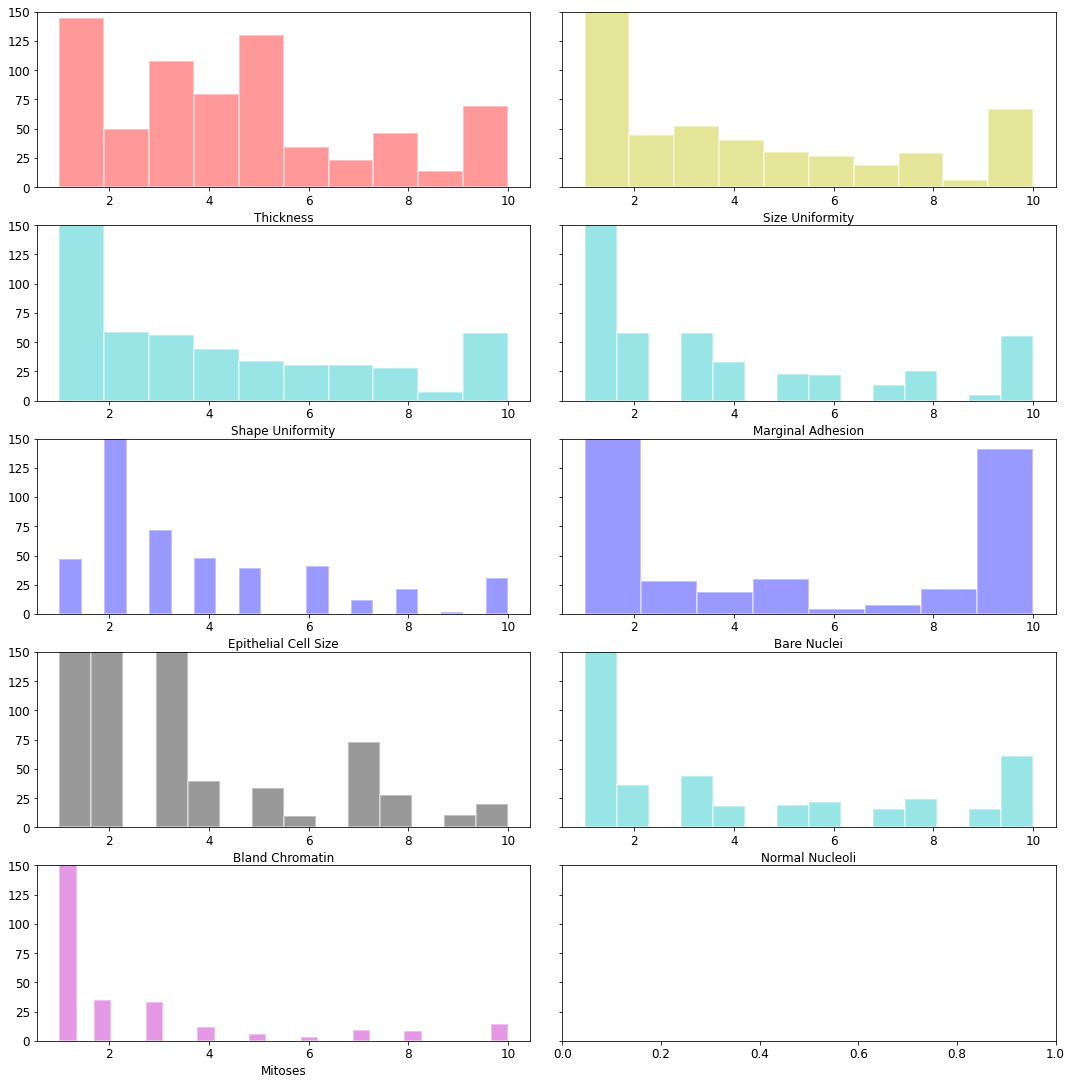

In [281]:
colors = np.array('b g r c m y k'.split()) #Different colors for plotting

fig,axes = plt.subplots(nrows =5,ncols=2, sharey=True,figsize = (15,15))
print(axes) #we see axes is an array with 5 rows where each row is made of two axes
            #So if we want to iterate, we need to get the row we want to work with for the graphs
plt.tight_layout()
row = 0
iteration = 0
for i in range(0,len(data.columns[:-1])):
    iteration+=1
    if(i%2==0):
        k = 0
    else:
        k = 1
    sns.distplot(data[data.columns[i]],kde=False,hist_kws=dict(edgecolor="w", linewidth=2),
                 color = np.random.choice(colors) ,ax=axes[row][k]) #here we decide which spot in the subplots we are filling out under ax = 
    if(iteration%2==0):
        row+=1
        plt.ylim(0,150)

In [282]:
malignant = data[data['diagnosis'] == 1]
benign = data[data['diagnosis'] == 0]
observe = list(data.columns[:-1])

Now to compare the two categories on each variable

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


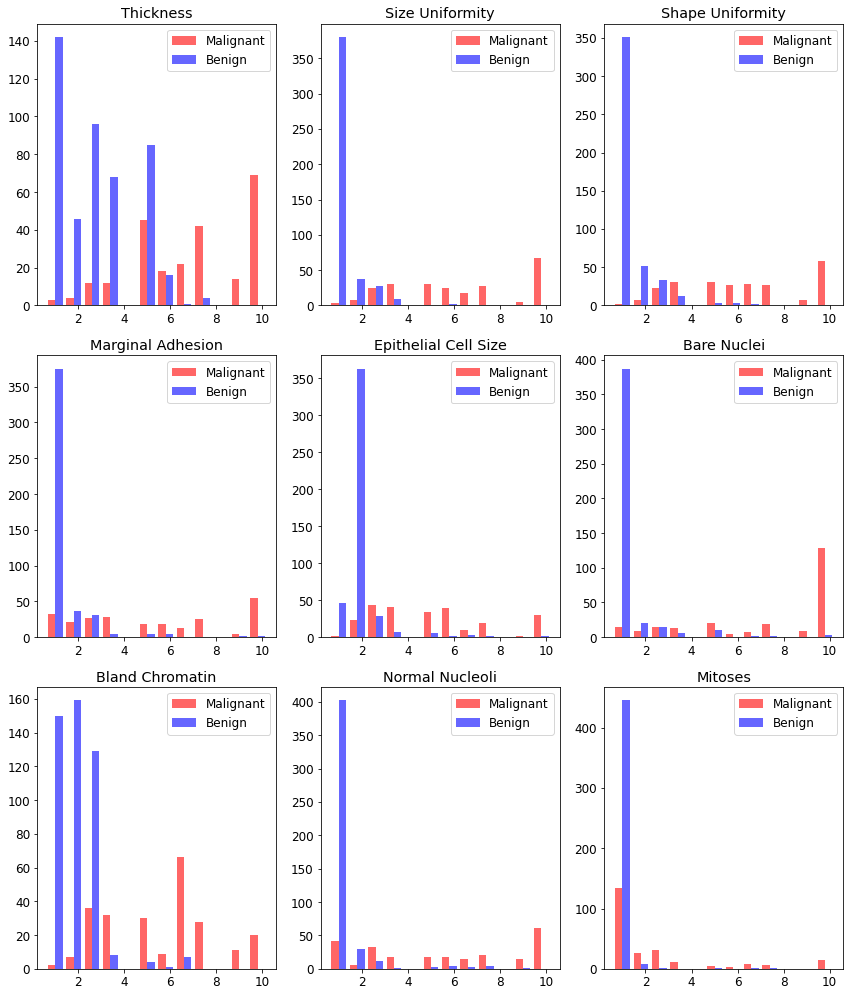

In [283]:
plt.rcParams.update({'font.size': 12})
plot, graphs = plt.subplots(nrows=3, ncols=3, figsize=(12,14))
graphs = graphs.flatten() #flatten into a 1d array, the identifiers for each graph
for i, graph in enumerate(graphs): #for each index and graph identifier
    binwidth= .8
    bins = np.arange(1,11,binwidth) #set bins with spaces in between actual values for visualizations
    graph.hist([malignant[observe[i]],benign[observe[i]]], bins=bins, alpha=0.6, label=['Malignant','Benign'], 
               color=['red','blue'], align = 'left', stacked = False, orientation = 'vertical')
    graph.legend(loc='upper right')
    graph.set_title(observe[i])
plt.tight_layout()

# Decision Tree model

Advantages
*   Decision trees are logarithmic in cost, meaning that this is not very intensive. Meaning this could be scaled to a much larger dataset
*   White box, meaning that we can actually understand how this works
*   Minimal data preparation needed

Disadvantages
*   Prone to overfit, we could prune to see if that helps
*   Slightly unstable, there might be better trees that represent the true population better
*   Requires a balanced dataset without "inadequate" attributes. Meaning we can't have several examples where the same set of attributes are indicative of different classes 



In [323]:
x = data.drop(['diagnosis'], axis = 1)
y = data['diagnosis'].values

## Normalization
$$
z_i = {x_i - min(x) \over max(x) - min(x)}
$$

In [324]:
#all values in x are numeric, so we can normalize them all together
x = (x - np.min(x)) / (np.max(x) - np.min(x))

## Testing data adequacy: 
> These take a while to run so they arent really needed

==================================================================

\
There are about 284 objects where there is another row with the same attributes

\
However, there are 0 objects where the attributes are the same but the class is different, meaning that this is an *adequate* dataset for a decision tree
 * This makes it an ideal dataset for a classification tree because there is no confusion as to how a combination of attributes indicates the class   

==================================================================
 



In [286]:
#This is the number of rows that have another row that is the exact same
count = 0

for row in data.iterrows():
  
  for row_compare in data.iterrows():
    if row[1][:-1].equals(row_compare[1][:-1]) and row[1][-1] == row_compare[1][-1] and row[0] != row_compare[0]:
      count += 1
      break

print(count)
    



284


In [287]:
#This is the number of rows that have the same attributes, but are a different "class"
count = 0
for row in data.iterrows():
  
  for row_compare in data.iterrows():
    if row[1][:-1].equals(row_compare[1][:-1]) and row[1][-1] != row_compare[1][-1] and row[0] != row_compare[0]:
      count += 1
      break

print(count)

0


## Model from ScikitLearn


*   Uses CART algorithm, meaning that each leaf can only have two children. aka binary trees
*   ID3 algorithm could produce nodes with more than 2 children




In [288]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.tree import export_graphviz


(CART) references the two types of decision trees we usually see: \

Classification (discrete variable) and Regression (continuous variable) Trees

\
Sklearn offers both of these as the two types of decision trees, because this is a classification problem we use the classifier

In [325]:
#I noticed here that there are some values where bare nuclei are null. This is because the original dataset had a '?' for those values
data.isnull().sum()
list(data[data['Bare Nuclei'].isnull() == True].index)

[23, 40, 139, 145, 158, 164, 235, 249, 275, 292, 294, 297, 315, 321, 411, 617]

In [329]:
#best thing to do here is probably to remove them completely
dropped = list(data[data['Bare Nuclei'].isnull() == True].index)

X = x.drop(labels = dropped, axis = 0)

y = np.delete(y, dropped)

#split data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [369]:
#create decision tree
d_tree = DecisionTreeClassifier(min_samples_leaf = 2, min_samples_split = 4, criterion = 'entropy')
  #some normalization here, we increased the min_samples_leaf and the min_samples_split
    #reduces overfitting
d_tree.fit(x_train, y_train)


DecisionTreeClassifier(criterion='entropy', min_samples_leaf=2,
                       min_samples_split=4)

In [349]:
#visualize decision tree
dot = export_graphviz(d_tree, feature_names = x.columns, class_names = ['benign', 'malignant'], out_file = 'tree.dot', filled = True)

In [350]:
!dot -Tpng tree.dot -o tree.png   

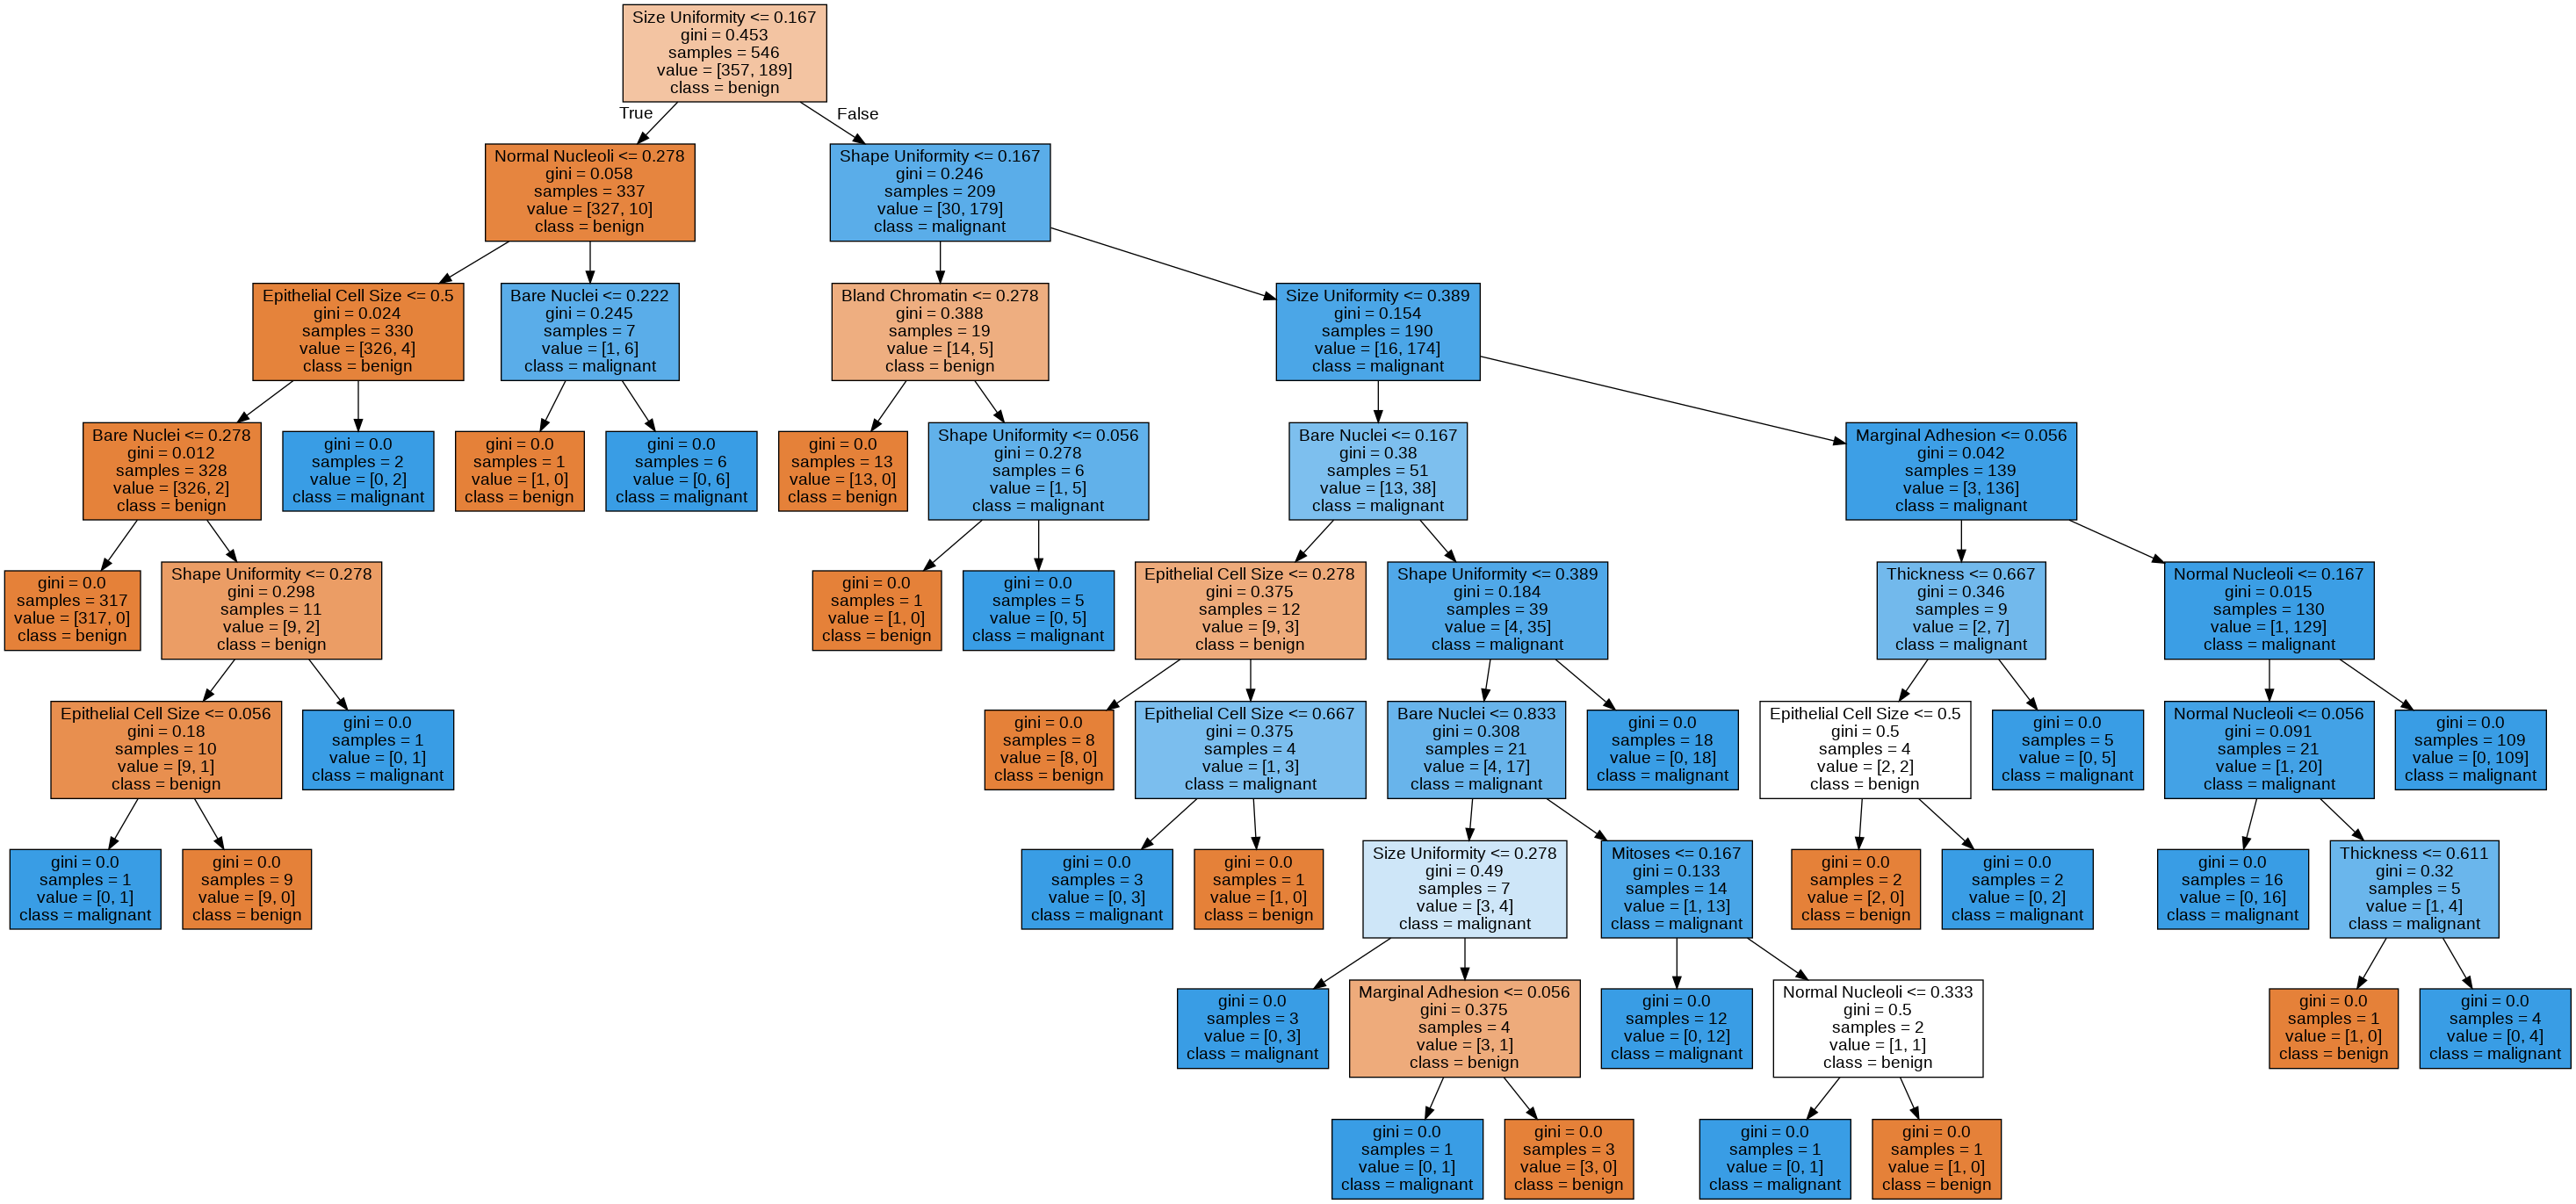

In [370]:
predicted = d_tree.predict(x_test)
sum(predicted == y_test) / len(y_test)

#There is a 94.16% accuracy on test set, if we called on the decision tree classifier without any modified parameters (not like above)
#We can bring this up to 95.62% by increasing the min_* hyperparameters to what we have in the code above

0.9562043795620438

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


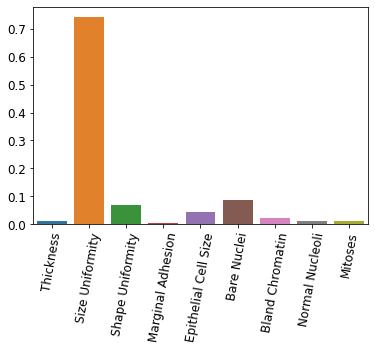

In [368]:
sns.barplot(data.columns[:-1], d_tree.feature_importances_)
plt.xticks(rotation = 80)
plt.show()

We notice above that this tree goes to a depth of 9, because we actually didn't set a depth, so let's see what happens if we set it to 8


What this might do is reduce overfitting by regularizing the model

Other ways you might regularize is by increasing the min hyperparameters or reducing the max hyperparameters


In [420]:
#create decision tree
d_tree = DecisionTreeClassifier(max_depth = 8, min_samples_leaf = 2, min_samples_split = 4)
d_tree.fit(x_train, y_train)

#visualize decision tree
dot = export_graphviz(d_tree, feature_names = x.columns, class_names = ['benign', 'malignant'], out_file = 'tree.dot', filled = True)

!dot -Tpng tree.dot -o tree.png   

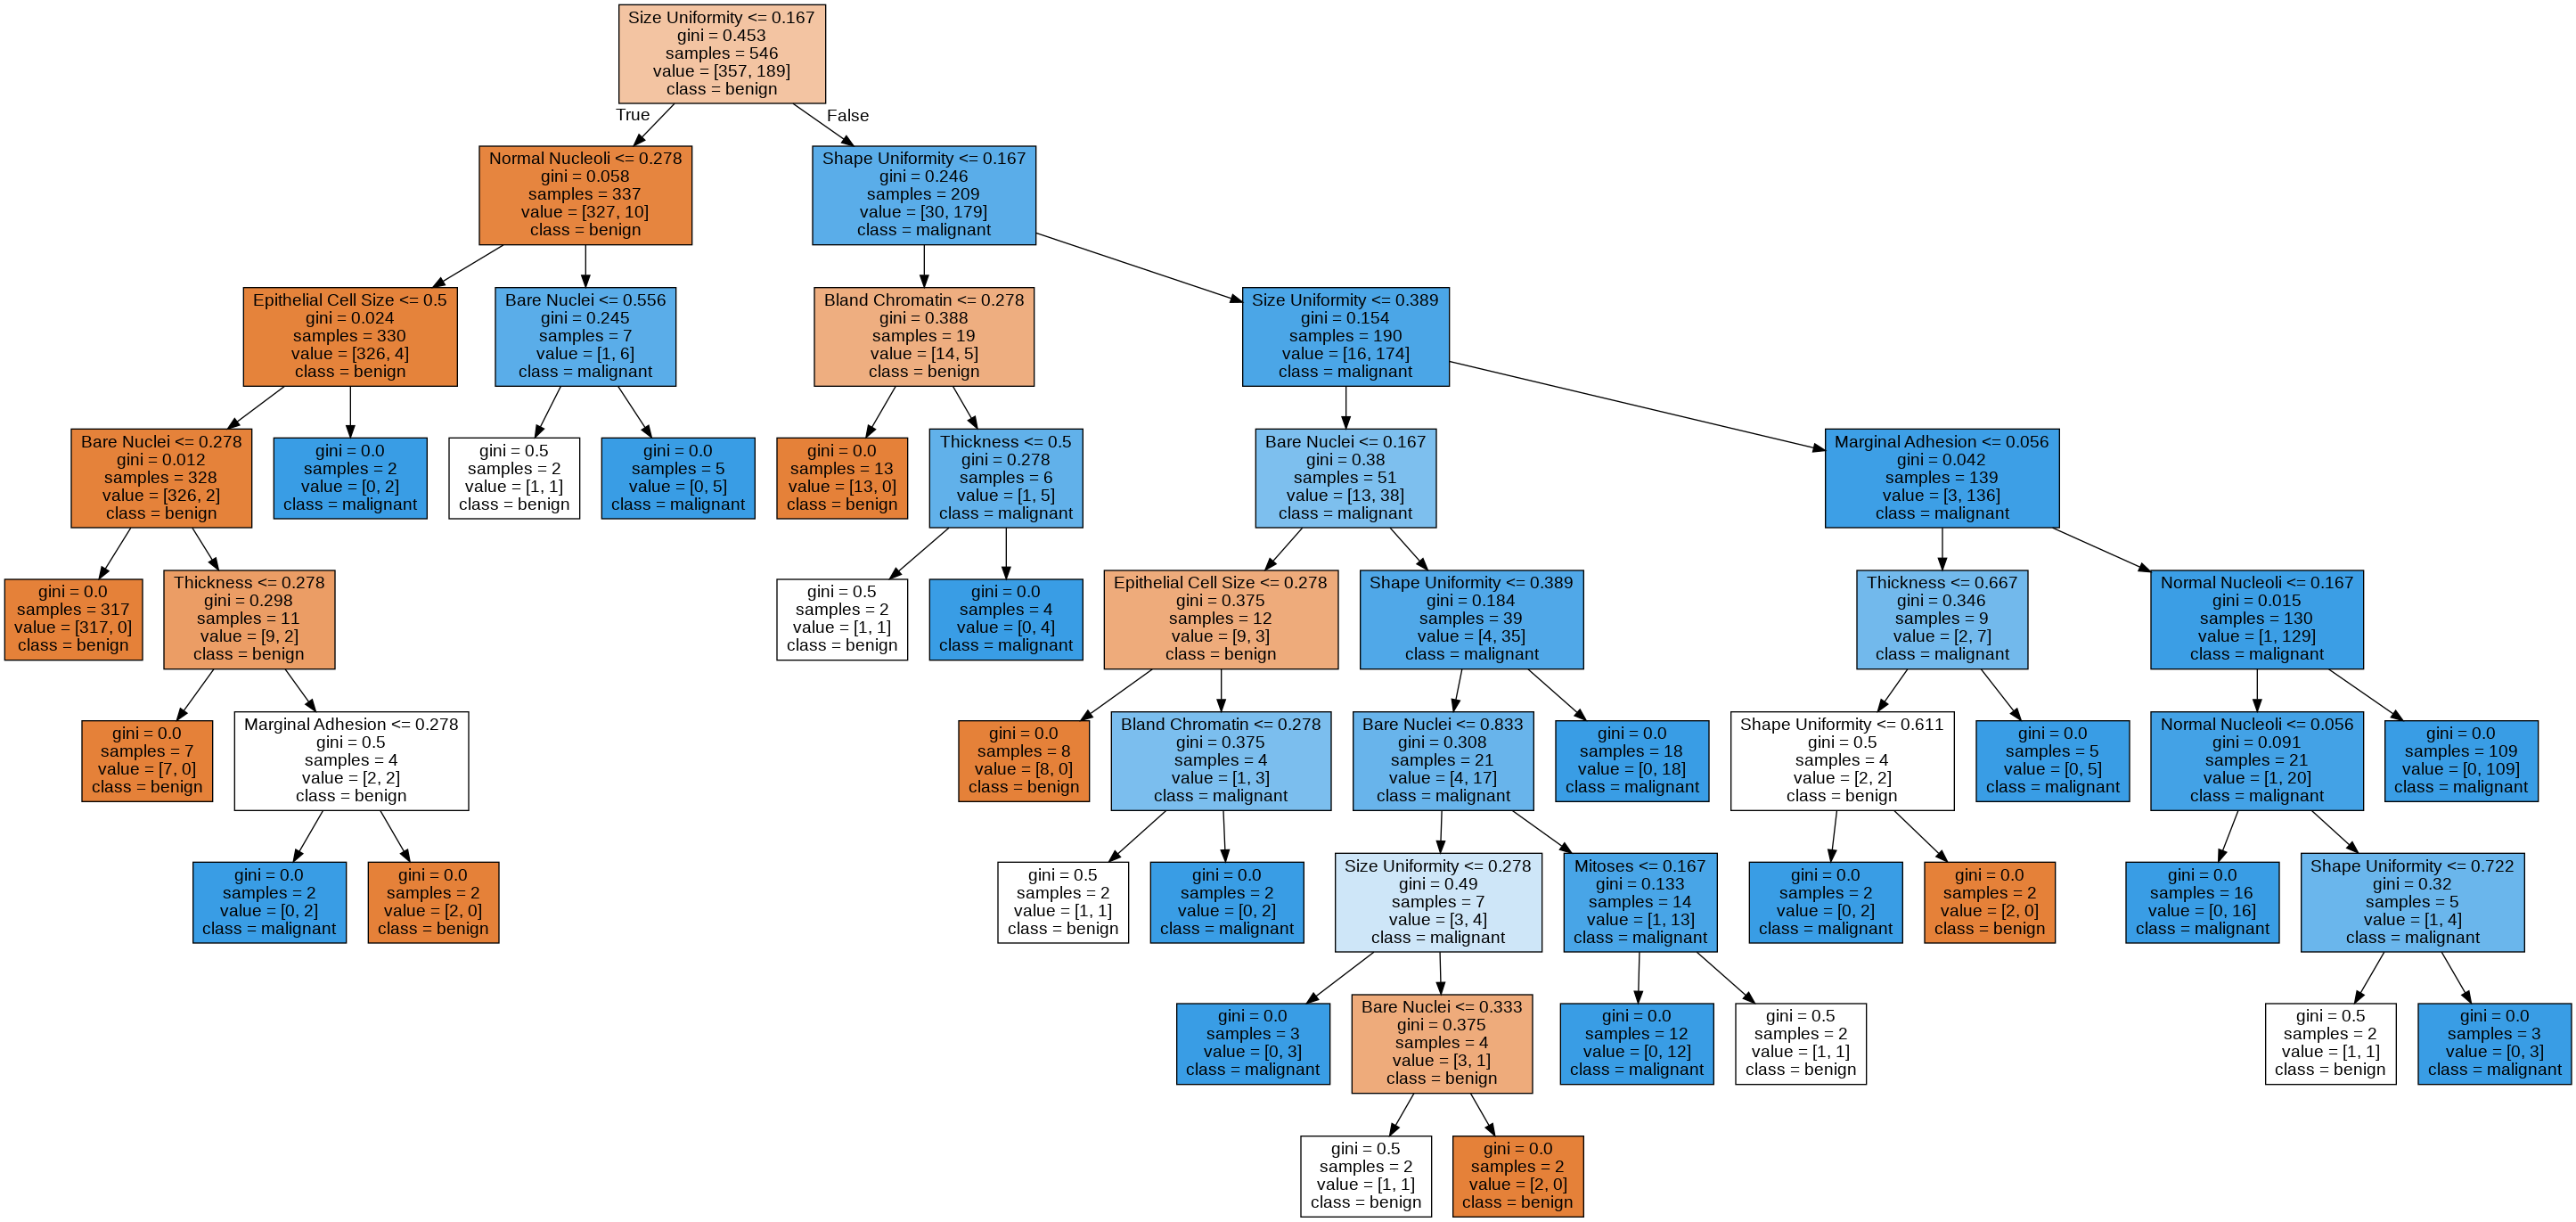

In [393]:
predicted = d_tree.predict(x_test)
sum(predicted == y_test) / len(y_test)

#Originally with no hyperparameters included in the tree initialization, there is a 92.7% accuracy on the test data
#With the included hyperparameters above, we can bring that accuracy up to 94.16% - 95.62% on the test data

0.9562043795620438

Above if you run the decision tree model multiple times, you actually find that the prediction accuracy can change, this is because there is some probability involved in calculting the trees.

We also see an improvement on the high end of the spectrum, so which model is better?


To deal with this, let's run it many times in a loop and find the optimal max_depth

# Hyper parameter tuning for models

In [408]:
depth_levels = np.arange(4,10)
depth_acc = []

for i in depth_levels:
  average_acc = []
  acc_list = []
  count = 0
  #create decision tree
  while count < 100:
    count += 1
    d_tree = DecisionTreeClassifier(max_depth = i, min_samples_leaf = 2, min_samples_split = 4)
    d_tree.fit(x_train, y_train)
    predicted = d_tree.predict(x_test)
    acc_list.append(sum(predicted == y_test) / len(y_test))
    
 
  average_acc.append(np.average(acc_list))
  depth_acc.append(average_acc)

print(depth_acc)

#4,5,6,7,8,9 depth_levels

[[0.9585401459854015], [0.9492700729927007], [0.9599270072992698], [0.9524817518248173], [0.9534306569343062], [0.9525547445255472]]


Here we see that the highest accuracy was 6, with a slight improvement over 4

If we were working with large large datasets in real-time, maybe a prediction is better with 4 to save a little bit of time

[]

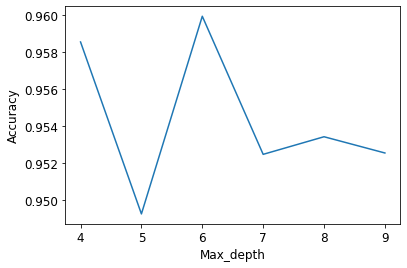

In [419]:
fig, ax = plt.subplots()
ax.plot(depth_levels, depth_acc)
ax.set_xlabel('Max_depth')
ax.set_ylabel('Accuracy')
plt.plot()

# In Conclusion:


*   It looks like our optimal model is with a max_depth of 6
*   We are able to acheive an accuracy of around 96% using this decision tree classifier, after optimizing some of our hyperparameters


